# What sells a car?

**The purpose of this report , I to try to determin what factor/factors influance more on the price of a car.This is based on the data from a car saling advertisment across a few years period.** 
Let us study the data we have inorder to get more general idea on the data that is in our hands.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


### Load data

In [2]:
# Load the data file into a DataFrame 
car_data_gen = pd.read_csv('/datasets/vehicles_us.csv')
#check that the dta was loaded properly
car_data_gen.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`- The price of a car in the advertisment
- `model_year` - The car year model
- `model` - The model of the car
- `condition` - The conditin of the car (these are second hand cars)
- `cylinders` - The  car engine nomber of cylinders
- `fuel` — On wht fuel the car runs on (e.g: gas, diesel, etc.)
- `odometer` — The vehicle's mileage when the ad was published
- `transmission`- The car transmition box(e.g : automatic , manual , etc.)
- `paint_color` - The color of the car.
- `is_4wd` — Whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame
#print data no. of rows and columns
print(car_data_gen.shape)
print()
#print the columns general data and look for abnormalities
car_data_gen.info()


(51525, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

car_data_gen.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36800,2499,2007.0,ford focus,good,4.0,gas,156853.0,automatic,sedan,purple,NaN,2019-02-10,27
38027,30995,2012.0,ram 2500,excellent,6.0,diesel,58584.0,automatic,truck,silver,1.0,2019-02-06,32
22294,8900,2011.0,honda cr-v,excellent,4.0,gas,123200.0,automatic,SUV,blue,1.0,2018-12-17,18
20596,13690,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,pickup,white,1.0,2019-01-09,99
21467,6800,2007.0,toyota tundra,good,8.0,gas,218000.0,automatic,truck,red,NaN,2018-10-13,29
38240,5000,NaN,ram 2500,good,6.0,diesel,339000.0,manual,pickup,white,NaN,2019-01-07,69
6756,7300,2008.0,ford ranger,excellent,6.0,gas,92000.0,automatic,pickup,black,1.0,2018-11-14,8
4932,22900,2015.0,ford f-150,like new,NaN,gas,101729.0,automatic,truck,silver,1.0,2018-06-07,35
50732,16998,2011.0,chevrolet silverado 1500,excellent,8.0,gas,93000.0,automatic,truck,white,1.0,2019-04-10,12
32400,15499,2016.0,buick enclave,like new,6.0,gas,52000.0,automatic,truck,NaN,1.0,2018-11-12,56


**Here are a few insights looking at a glance at the data:**

1 - There are missing data in the following columns: model_year , cylinders, odometer , paint_color ,is_4wd , the most number of missing values is in the 'is_4wd' column , probably because that there are not much 4WD cars.

2 - Some type of data in columns is not as it should be (i.e object type instead of date_time or int or float etc.)

3 - column names that are not so coherent , like odometers.


In [5]:
#checking the names of the columns, to look for hidden gaps or misspeled names etc.
car_data_gen.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

The column names look ok , but still the name 'odometer' can be changed for more understandable name.

[Are there columns with inappropriate data types?]

### Conclusions and further steps

The dataset has some issue that  we will need to address:

1 - A lot of missing values and decide if we will fill them or not.

2 - categotize the paint_color column with pain_category

2 - Transfor a name of a column or two.

We will need to check the data and prepare("clean the data" )it for categorization, before wqe can use it, in our investigation.


## Treat missing values (if any)

I could see in the data sample some missing values. I  need to see theire category and and theire share in the dataset in order to know my next steps.As how to approche each one.
Since there are missing values in diffrent categories I want to  see the way they are spread in the dataset.So for that  will extract them to a new data set that wil contain all the raws with the missing values.


In [6]:
#Using .isna methos to extract the missing values share,to a new database
car_data_gen_missing_vals = car_data_gen[car_data_gen.isna().any(axis = 1)].reset_index(0,drop=True)

#print the firs 10 rows of the new dataset
car_data_gen_missing_vals.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
6,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
7,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
8,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
9,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37


In [7]:
#print the number of records it contains
len(car_data_gen_missing_vals)

36673

***The Missing values are spread and are not symetrical there for we will have to fill in the missing data with valid information*** 

**To see what values we have where data is missing, we will check each column that has missing values , the list of uniqe values it has.The columns we will explore are :model_year , cylinders , odometer , paint_color, is_4wd**

In [8]:
#list of the columns we want to check he unique values
chk_lst = ['model_year' , 'cylinders' , 'odometer' , 'paint_color', 'is_4wd']

#loop to print each column unique values
for col in chk_lst:
    print('unique values for {} column: \n'.format(col))
    print(car_data_gen[col].sort_values().unique())
    print()

unique values for model_year column: 

[1908. 1929. 1936. 1948. 1949. 1954. 1955. 1958. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.   nan]

unique values for cylinders column: 

[ 3.  4.  5.  6.  8. 10. 12. nan]

unique values for odometer column: 

[0.0e+00 1.0e+00 2.0e+00 ... 9.8e+05 9.9e+05     nan]

unique values for paint_color column: 

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]

unique values for is_4wd column: 

[ 1. nan]



*Checking all other columns unique values just to make sure there are no issue to address there

In [9]:
#making the list for all other columns
chk_lst_all = []

for item in list(car_data_gen.columns):
    if item in chk_lst :
        pass
    else:
        chk_lst_all.append(item)
        
#loop to print each column unique values
for col in chk_lst_all:
    print('unique values for {} column: \n'.format(col))
    print(car_data_gen[col].sort_values().unique())
    print()

unique values for price column: 

[     1      3      5 ... 189000 300000 375000]

unique values for model column: 

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150' 'ford f-250'
 'ford f-250 sd' 'ford f-250 super duty' 'ford f-350 sd' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion

No issues there.

In [10]:
#checking each column for the percentage of missing values
miss_val_col_check = car_data_gen.isnull().sum().to_frame('miss_val_col_check')
miss_val_col_check['%'] = round(car_data_gen.isnull().sum()/len(car_data_gen)*100,3)
miss_val_col_check.sort_values(by='%', ascending=False)

,miss_val_col_check,%
is_4wd,25953,50.370
paint_color,9267,17.985
odometer,7892,15.317
cylinders,5260,10.209
model_year,3619,7.024
price,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


**Looking at the unique values, and the percentage of them froom the general data, we come to a conclusion that, we will need to fill each column with a diffrent value that will agree with that type of information. we can not delete the rows with the missing values, because that will cut off mor then 50% of the data, and we can not know if the data we lost was essential or not for our query.**

So let us start filling the missing values one by one.

*Get a value for the model_year column missing values*

This column contain a crucial information that surly have ,an impact on the price of a car.there are 7% missing data from this column.we need a method to get an aproximate model of a car.
for that we will use a new dataframe that will have year_model and and model(that has no missing data at all).
from this new data frame i will aggragate the modeles by 'model' and te column will be the model_year. And when I will find a Model_year missing a value , I can esstimate by model name its model_year.

In [11]:
#making a new dataframe with the two colmns model, and year_model
model_year_agg = car_data_gen[['model','model_year']]
print(len(model_year_agg))
#delete all raws where ther are missing values in model_year column
model_year_agg = model_year_agg.dropna()
#checking that the data was deleted form the new dataframe
print(len(model_year_agg))

#group all the data by model and aggragate it by year mean, making a dictionary for the year missing values
model_year_agg_mean = model_year_agg.groupby('model')['model_year'].agg(Mean='mean')
#rounding all the mean to one integer value
model_year_agg_mean['Mean'] = model_year_agg_mean['Mean'].astype('int64')
print('\n' , model_year_agg_mean.loc['buick enclave','Mean'])
print('\n' , model_year_agg_mean.loc[(car_data_gen['model'].loc[30]),'Mean'])

model_year_agg_mean.loc['ford f-150']

51525
47906

 2012

 2007


Mean    2009
Name: ford f-150, dtype: int64

We now have a 100 lines of data to fill in all the missing data of model_year by model.
*let us apply it to the general dataframe*

In [12]:
def get_pos_val(row):   
    pos = row['model_year']
    return(str(pos))

#a function that will apply the right value based on the model 
def find_year_model(row):
    
    if str(get_pos_val(row)).lower() == 'nan' or str(get_pos_val(row)).lower() == 'none':
        try: 
            #if there will be a model in model_year_agg_mean table
            model_year = model_year_agg_mean.loc[(row['model']),'Mean']
            return(model_year)
        except: 
            #if there will be no! model in model_year_agg_mean table 
            return (row['model_year'])
    
    else:
        return (row['model_year'])

#check if it works using car_data_gen_missing_vals
print('\nRow values: \n', car_data_gen_missing_vals.iloc[1])
print('\nFunction return values: \n', find_year_model(car_data_gen_missing_vals.iloc[1]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[1,'model'] , model_year_agg_mean.loc[(car_data_gen_missing_vals.loc[1,'model'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[700])
print('\nFunction return values: \n', find_year_model(car_data_gen_missing_vals.iloc[700]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[700,'model'] , model_year_agg_mean.loc[(car_data_gen_missing_vals.loc[700,'model'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[150])
print('\nFunction return values: \n', find_year_model(car_data_gen_missing_vals.iloc[150]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[150,'model'] , model_year_agg_mean.loc[(car_data_gen_missing_vals.loc[150,'model'])]))




Row values: 
 price                25500
model_year             NaN
model           ford f-150
condition             good
cylinders              6.0
fuel                   gas
odometer           88705.0
transmission     automatic
type                pickup
paint_color          white
is_4wd                 1.0
date_posted     2018-10-19
days_listed             50
Name: 1, dtype: object

Function return values: 
 2009

 model_year_agg_mean mean of ford f-150 value: Mean    2009
Name: ford f-150, dtype: int64


Row values: 
 price                    2800
model_year             2006.0
model           nissan altima
condition                good
cylinders                 4.0
fuel                      gas
odometer             145000.0
transmission        automatic
type                    sedan
paint_color            silver
is_4wd                    NaN
date_posted        2019-01-06
days_listed                39
Name: 700, dtype: object

Function return values: 
 2006.0

 model_year_agg_mean 

In [13]:
#apply the function on the missing values in 'model_year' column
car_data_gen['model_year'] = car_data_gen.apply(find_year_model , axis = 1)

#apply the function on the missing values in 'model_year' column of car_data_gen_missing_vals also
car_data_gen_missing_vals['model_year'] = car_data_gen_missing_vals.apply(find_year_model , axis = 1)

car_data_gen.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [14]:
#check rhat there are no missing values in the model_year column
print(len(car_data_gen['model_year'].loc[car_data_gen['model_year'].isnull()]))

0


**We have filled all missing values in the model_year column.
Let us do the same to all other columns that we will need in our investigation.
Let us check which columns have missing values**

In [15]:
#making the list for all columns
chk_lst_all = list(car_data_gen.columns)

        
#loop to print each column number of missing values for a reminder
for col in chk_lst_all:
    print('missing values for {} column is: {}'.format(col ,len(car_data_gen[col].loc[car_data_gen[col].isnull()])))
    print('Percentage of he general data : {:.0%}\n'.format(len(car_data_gen[col].loc[car_data_gen[col].isnull()])/len(car_data_gen)))
    
    

missing values for price column is: 0
Percentage of he general data : 0%

missing values for model_year column is: 0
Percentage of he general data : 0%

missing values for model column is: 0
Percentage of he general data : 0%

missing values for condition column is: 0
Percentage of he general data : 0%

missing values for cylinders column is: 5260
Percentage of he general data : 10%

missing values for fuel column is: 0
Percentage of he general data : 0%

missing values for odometer column is: 7892
Percentage of he general data : 15%

missing values for transmission column is: 0
Percentage of he general data : 0%

missing values for type column is: 0
Percentage of he general data : 0%

missing values for paint_color column is: 9267
Percentage of he general data : 18%

missing values for is_4wd column is: 25953
Percentage of he general data : 50%

missing values for date_posted column is: 0
Percentage of he general data : 0%

missing values for days_listed column is: 0
Percentage of he 

**We have four columns with Missing values.
Studing the columns values , 'paint_color', there is no way we can get the right car color for all 10,000 cars.
there for all of its missing values will be filled with 'other'.

The other two parameters, are essential for our investigation so we must fill their missing values : 

*odometer*  -  we need to fine a way to give an estimate of a cars mileage. It can effects a cars' price due to tare factor.

*is_4wd*  -  This factor can have an effect on a price , due to the extra power it can genarate in though conditions.Because it is a 'have 4wd'- yes\no situation, we can change all the data in it to boolean(like where 1 is has and 0 does not have)

The forth parameter 'cylinder' is derived from the car model and the year , so we can guess by combining these two parameters the number of cylinders that is missing



**Let us start with the odometer column - 

This column contains mileage of the car we can change its name to mileage, and find tha same as we did in model_year column , to find the mean and apply it to the odometer column. I choose the mean due to is nature. since we have many cars and all are from diffrent areas and different drivers, there is a general value that will combine all theire mileage , and it is the mean. This will reflact the average miles a car from a year_model have done.
Also, the data missing contains 15% of the data so the general effect using the mean will not be great since we will group all by year factor.


In [16]:
#making a new dataframe with the two colmns model, and year_model
year_mileage_agg = car_data_gen[['model_year','odometer']]
print(len(year_mileage_agg))

#delete all raws where ther are missing values in odometer column
year_mileage_agg = year_mileage_agg.dropna()
#checking that the data was deleted form the new dataframe
print(len(year_mileage_agg))

#group all the data by model and aggragate it by year mean, making a dictionary for the year missing values
year_mileage_agg_mean = year_mileage_agg.groupby('model_year')['odometer'].agg(Mean='mean')
#rounding all the mean to one integer value
year_mileage_agg_mean['Mean'] = year_mileage_agg_mean['Mean'].astype('int64')

print('\n' , year_mileage_agg_mean.loc[2018.0,'Mean'])
print('\n' , year_mileage_agg_mean.loc[(car_data_gen['model_year'].loc[30]),'Mean'])

year_mileage_agg_mean.loc[2006.0]
year_mileage_agg_mean

51525
43633

 25231

 131150


,Mean
model_year,
1908.0,169328
1936.0,30000
1948.0,4000
1949.0,1800
1954.0,3565
...,...
2015.0,81739
2016.0,61455
2017.0,47369


**Tending the mileage column

In [17]:

def get_pos_mileage_val(row):   
    pos = row['odometer']
    return(str(pos))

#a function that will apply the right value based on the model 
def find_milage_year(row):
    
    if str(get_pos_mileage_val(row)).lower() == 'nan' or str(get_pos_mileage_val(row)).lower() == 'none':
        try: 
            #if there will be a model_year in year_mileage_agg_mean table
            mileage_year = year_mileage_agg_mean.loc[(row['model_year']),'Mean']
            return(mileage_year)
        except: 
            #if there will be no! model_year in year_mileage_agg_mean table 
            return (row['odometer'])
    
    else:
        return (row['odometer'])

#check if it works using car_data_gen_missing_vals
print('\nRow values: \n', car_data_gen_missing_vals.iloc[1])
print('\nFunction return values: \n', find_milage_year(car_data_gen_missing_vals.iloc[1]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[1,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[1,'model_year'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[700])
print('\nFunction return values: \n', find_milage_year(car_data_gen_missing_vals.iloc[700]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[700,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[700,'model_year'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[150])
print('\nFunction return values: \n', find_milage_year(car_data_gen_missing_vals.iloc[150]))
print('\n model_year_agg_mean mean of {} value: {}\n'.format(car_data_gen_missing_vals.loc[150,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[150,'model_year'])]))




Row values: 
 price                25500
model_year          2009.0
model           ford f-150
condition             good
cylinders              6.0
fuel                   gas
odometer           88705.0
transmission     automatic
type                pickup
paint_color          white
is_4wd                 1.0
date_posted     2018-10-19
days_listed             50
Name: 1, dtype: object

Function return values: 
 88705.0

 model_year_agg_mean mean of 2009.0 value: Mean    131150
Name: 2009.0, dtype: int64


Row values: 
 price                    2800
model_year             2006.0
model           nissan altima
condition                good
cylinders                 4.0
fuel                      gas
odometer             145000.0
transmission        automatic
type                    sedan
paint_color            silver
is_4wd                    NaN
date_posted        2019-01-06
days_listed                39
Name: 700, dtype: object

Function return values: 
 145000.0

 model_year_agg_mean m

In [18]:
#apply the function on the missing values in 'odometer' column
car_data_gen['odometer'] = car_data_gen.apply(find_milage_year , axis = 1)
#apply the function on the missing values in 'odometer' column on car_data_gen_missing_vals
car_data_gen_missing_vals['odometer'] = car_data_gen_missing_vals.apply(find_milage_year , axis = 1)


#check that there are no missing values in the odometer column
print(len(car_data_gen['odometer'].loc[car_data_gen['odometer'].isnull()]))
print(len(car_data_gen_missing_vals['odometer'].loc[car_data_gen_missing_vals['odometer'].isnull()]))


1
1


In [19]:
#check the row with missing values in the odometer column that the function di not manage to change
print(car_data_gen.loc[car_data_gen['odometer'].isnull()])
print(car_data_gen_missing_vals.loc[car_data_gen_missing_vals['odometer'].isnull()])

       price  model_year       model condition  cylinders fuel  odometer  \
45694  18000      1929.0  ford f-150      good        8.0  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
45694       manual  other      silver     NaN  2018-11-18           59  
       price  model_year       model condition  cylinders fuel  odometer  \
32506  18000      1929.0  ford f-150      good        8.0  gas       NaN   

      transmission   type paint_color  is_4wd date_posted  days_listed  
32506       manual  other      silver     NaN  2018-11-18           59  


In [20]:
#since it only one record we can delete it from bothe datasets.
car_data_gen.dropna(subset=['odometer'],inplace=True)
car_data_gen_missing_vals.dropna(subset=['odometer'],inplace=True)


#check that there are no missing values in the odometer column
print(len(car_data_gen['odometer'].loc[car_data_gen['odometer'].isnull()]))
print(len(car_data_gen_missing_vals['odometer'].loc[car_data_gen_missing_vals['odometer'].isnull()]))


0
0


**After we made the changes in the 'odometer' column, we will moove to 'is_4wd' column. and replace all Nan values to 0. Thus making this column categorized as:**

**1 - with 4wd**

**0- without 4wd**

In [21]:
#using fillna() to replace the missing values with 0
car_data_gen['is_4wd'].fillna(value= 0 , inplace=True )
car_data_gen_missing_vals['is_4wd'].fillna(value= 0 , inplace=True )

#check that there are no missing values in the is_4wd column
print(len(car_data_gen['is_4wd'].loc[car_data_gen['is_4wd'].isnull()]))
print(len(car_data_gen_missing_vals['is_4wd'].loc[car_data_gen_missing_vals['is_4wd'].isnull()]))


0
0


**Now we will address the 'cylinders' column missing values**

In [22]:
#making a new dataframe with the two colmns model, and year_model
cylinder_year_model_agg = car_data_gen[['model_year','model','cylinders']]
print(len(cylinder_year_model_agg))

#delete all raws where ther are missing values in odometer column
cylinder_year_model_agg = cylinder_year_model_agg.dropna()
#checking that the data was deleted form the new dataframe
print(len(cylinder_year_model_agg))

#group all the data by model and aggragate it by year mean, making a dictionary for the year missing values
cylinder_year_model_agg_mean = cylinder_year_model_agg.groupby(['model','model_year'])['cylinders'].agg(Mean='mean')
#rounding all the mean to one integer value
cylinder_year_model_agg_mean['Mean'] = cylinder_year_model_agg_mean['Mean'].astype('int64')

print('\n' , cylinder_year_model_agg_mean.loc[('chevrolet silverado 3500hd',2018.0),'Mean'])
#print('\n' , cylinder_year_model_agg_mean.loc[(car_data_gen['model_year'].loc[30]),'Mean'])

cylinder_year_model_agg_mean.loc['chevrolet silverado 3500hd',2006.0]
cylinder_year_model_agg_mean

51524
46264

 8


Mean
model             model_year      
acura tl          1999.0         6
                  2001.0         6
                  2002.0         6
                  2003.0         6
                  2004.0         5
...                            ...
volkswagen passat 2014.0         4
                  2015.0         4
                  2016.0         4
                  2017.0         4
                  2018.0         4

[2204 rows x 1 columns]

In [23]:
def get_pos_mileage_val(row):   
    pos = row['cylinders']
    return(str(pos))

#a function that will apply the right value based on the model and year
def find_cylinders_model_year(row):
    
    if str(get_pos_mileage_val(row)).lower() == 'nan' or str(get_pos_mileage_val(row)).lower() == 'none':
        try: 
            #if there will be a model_year in cylinder_year_model_agg_mean table
            cylinders = cylinder_year_model_agg_mean.loc[(row['model'],row['model_year']),'Mean']
            return(cylinders)
        except: 
            #if there will be no! model_year in cylinder_year_model_agg_mean table 
            return (row['cylinders'])
    
    else:
        return (row['cylinders'])

#check if it works using car_data_gen_missing_vals
print('\nRow values: \n', car_data_gen_missing_vals.iloc[1])
print('\nFunction return values: \n', find_cylinders_model_year(car_data_gen_missing_vals.iloc[1]))
print('\n cylinder_year_model_agg_mean mean of {} year {} value: {}\n'.format(car_data_gen_missing_vals.loc[1,'model'] , car_data_gen_missing_vals.loc[1,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[1,'model_year'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[700])
print('\nFunction return values: \n', find_cylinders_model_year(car_data_gen_missing_vals.iloc[700]))
print('\n model_year_agg_mean mean of {} year {} value: {}\n'.format(car_data_gen_missing_vals.loc[700,'model'],car_data_gen_missing_vals.loc[700,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[700,'model_year'])]))

print('\nRow values: \n', car_data_gen_missing_vals.iloc[150])
print('\nFunction return values: \n', find_cylinders_model_year(car_data_gen_missing_vals.iloc[150]))
print('\n model_year_agg_mean mean of{} year {} value: {}\n'.format(car_data_gen_missing_vals.loc[150,'model'],car_data_gen_missing_vals.loc[150,'model_year'] , year_mileage_agg_mean.loc[(car_data_gen_missing_vals.loc[150,'model_year'])]))



Row values: 
 price                25500
model_year          2009.0
model           ford f-150
condition             good
cylinders              6.0
fuel                   gas
odometer           88705.0
transmission     automatic
type                pickup
paint_color          white
is_4wd                 1.0
date_posted     2018-10-19
days_listed             50
Name: 1, dtype: object

Function return values: 
 6.0

 cylinder_year_model_agg_mean mean of ford f-150 year 2009.0 value: Mean    131150
Name: 2009.0, dtype: int64


Row values: 
 price                    2800
model_year             2006.0
model           nissan altima
condition                good
cylinders                 4.0
fuel                      gas
odometer             145000.0
transmission        automatic
type                    sedan
paint_color            silver
is_4wd                    0.0
date_posted        2019-01-06
days_listed                39
Name: 700, dtype: object

Function return values: 
 4.0

 model

In [24]:
#apply the function on the missing values in 'cylinders' column
car_data_gen['cylinders'] = car_data_gen.apply(find_cylinders_model_year , axis = 1)
#apply the function on the missing values in 'cylinders' column on car_data_gen_missing_vals
car_data_gen_missing_vals['cylinders'] = car_data_gen_missing_vals.apply(find_cylinders_model_year , axis = 1)


#check that there are no missing values in the odometer column
print(len(car_data_gen['cylinders'].loc[car_data_gen['cylinders'].isnull()]))
print(len(car_data_gen_missing_vals['cylinders'].loc[car_data_gen_missing_vals['cylinders'].isnull()]))


26
26


In [25]:
print (car_data_gen['cylinders'].min())
car_data_gen['cylinders'].max()


3.0


12.0

**since we have been left with 26 rows where cylinders were not found a match we will replace it with : 
6 (the middle of max numbers of cylinders - an arbituary number to fill 26 missing values that will 
not have profound effect becaus they are only 0.5% of the data.**

In [26]:
#filling the missing value
car_data_gen['cylinders'].fillna(value = 6 , inplace = True)
print(len(car_data_gen['cylinders'].loc[car_data_gen['cylinders'].isnull()]))

0


**Now we can fill the 'paint_color' column, as it has too much missing values that we can not know what paint is each of the missing value(almost 10,000 ecords that are missing) we will fill it with 'other' as category of unknown paint**

In [27]:
car_data_gen['paint_color'].fillna(value='other', inplace = True)
car_data_gen_missing_vals['paint_color'].fillna(value='other', inplace = True)

print(car_data_gen.columns)
print(car_data_gen_missing_vals.columns)



Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')
Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


In [28]:
car_data_gen.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,162072.0,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [29]:
#checking to see if any Nan values remaind in car_data_gen
#checking each column for the percentage of missing values
miss_val_col_check = car_data_gen.isnull().sum().to_frame('miss_val_col_check')
miss_val_col_check['%'] = round(car_data_gen.isnull().sum()/len(car_data_gen)*100,3)
miss_val_col_check.sort_values(by='%', ascending=False)

,miss_val_col_check,%
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


*No more missing values**

## Categorizing

**Above we saw that we neadto categorize the 'paint_color' column - since it it categoricl values and for our investigation we will need to investigate with some numerical values.**

In [30]:
#prepare a dictionary for the paint category
paint_dict={}
paint_lst = list(car_data_gen['paint_color'].unique())

category_num = 1

#genarating the dictinary
for pnt in paint_lst:
    paint_dict[pnt]=category_num
    category_num += 1
#printing the dictionary
paint_dict

{'other': 1,
 'white': 2,
 'red': 3,
 'black': 4,
 'blue': 5,
 'grey': 6,
 'silver': 7,
 'custom': 8,
 'orange': 9,
 'yellow': 10,
 'brown': 11,
 'green': 12,
 'purple': 13}

In [31]:
#generating the paint_category column based on paint_dict
def return_paint(row):
    
    pnt = row['paint_color']
    return(str(pnt))
    
    
def paint_cat(row):
        
    return(int(paint_dict[return_paint(row)]))

#car_data_gen['paint_category'] = car_data_gen.apply(paint_cat)

#car_data_gen

In [32]:
#check if it works
# Check if it works
print(paint_cat(car_data_gen.iloc[20]))
print(paint_cat(car_data_gen.iloc[45]))
print(paint_cat(car_data_gen.iloc[88]))
print(paint_cat(car_data_gen.iloc[65]))

7
10
10
2


In [33]:
car_data_gen['paint_category'] = car_data_gen.apply(paint_cat,axis=1)

car_data_gen

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,1
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3
3,1500,2003.0,ford f-150,fair,8.0,gas,162072.0,automatic,pickup,other,0.0,2019-03-22,9,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,5
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,4


## Fix data types

**The data now has no missing values. But the data types of som of the columns is wrong. We will change it now.**

In [34]:
car_data_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           51524 non-null  int64  
 1   model_year      51524 non-null  float64
 2   model           51524 non-null  object 
 3   condition       51524 non-null  object 
 4   cylinders       51524 non-null  float64
 5   fuel            51524 non-null  object 
 6   odometer        51524 non-null  float64
 7   transmission    51524 non-null  object 
 8   type            51524 non-null  object 
 9   paint_color     51524 non-null  object 
 10  is_4wd          51524 non-null  float64
 11  date_posted     51524 non-null  object 
 12  days_listed     51524 non-null  int64  
 13  paint_category  51524 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.9+ MB


In [35]:
#all those who have decimal point that is not neccecary, to to being float and not int
car_data_gen['model_year'] = car_data_gen['model_year'].astype('int64')
car_data_gen['cylinders'] = car_data_gen['cylinders'].astype('int64')
car_data_gen['odometer'] = car_data_gen['odometer'].astype('int64')
car_data_gen['is_4wd'] = car_data_gen['is_4wd'].astype('int64')

#This column should be date_time and not an object
car_data_gen['date_posted'] = pd.to_datetime(car_data_gen['date_posted'],dayfirst=True)

car_data_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int64         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  object        
 4   cylinders       51524 non-null  int64         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  int64         
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  int64         
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  paint_category  51524 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage

In [36]:
#check the changes
car_data_gen.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3
3,1500,2003,ford f-150,fair,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4


## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [37]:
# Add datetime values for when the ad was placed
#using lambda expression to add the new 'day_of_week' to tha table

car_data_gen['day_of_week'] = car_data_gen['date_posted'].dt.dayofweek

car_data_gen.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category,day_of_week
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3
3,1500,2003,ford f-150,fair,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1


In [38]:
# Add the vehicle's age when the ad was placed

car_data_gen['car_age'] = (car_data_gen['date_posted'].dt.year - car_data_gen['model_year']).astype('int64')
car_data_gen.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category,day_of_week,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5,7
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4,9
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,6
3,1500,2003,ford f-150,fair,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1,4,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1,2


In [39]:
# Add the vehicle's average mileage per year
car_data_gen['avg_mileage'] = round((car_data_gen['odometer'] / car_data_gen['car_age'])).astype('float64')
car_data_gen.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category,day_of_week,car_age,avg_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5,7,20714.0
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4,9,9856.0
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,6,18333.0
3,1500,2003,ford f-150,fair,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1,4,16,10130.0
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1,2,40452.0


In [40]:
#checking to see if category will make it easier on condition manipulation 
car_data_gen['condition'].unique() 

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [41]:
#replacing 'condition' values with category numeric values (5-new to 0-salvage), something that can be manipulated more easily
def condition_category(row):
    if row['condition'].lower() == 'new':
        return (5)
    elif row['condition'].lower() == 'like new':
        return (4)
    elif row['condition'].lower() == 'excellent':
        return (3)
    elif row['condition'].lower() == 'good':
        return (2)
    elif row['condition'].lower() == 'fair':
        return (1)
    elif row['condition'].lower() == 'salvage':
        return (0)

car_data_gen['condition'] = car_data_gen.apply(condition_category , axis=1)

car_data_gen.head()



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_category,day_of_week,car_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5,7,20714.0
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4,9,9856.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,6,18333.0
3,1500,2003,ford f-150,1,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1,4,16,10130.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1,2,40452.0


## Checking for duplicates
After filling the missing data we now will check for any duplicated data.

In [42]:
print(len(car_data_gen.loc[(car_data_gen.duplicated())]))

0


**There are no duplicated data** 

We moove to the data analyses.


## Rename columns

We have columns with not so understanable names : 'odometer', 'is_4wd' , 'day_of_week'
need to be : 'mileage' and 'has_4wd', 'weekday_posted_on'

In [43]:
car_data_gen.rename(columns={'odometer':'mileage' , 'is_4wd':'has_4wd', 'day_of_week':'weekday_posted_on'},inplace=True)
car_data_gen.head()

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,has_4wd,date_posted,days_listed,paint_category,weekday_posted_on,car_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5,7,20714.0
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4,9,9856.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,3,6,18333.0
3,1500,2003,ford f-150,1,8,gas,162072,automatic,pickup,other,0,2019-03-22,9,1,4,16,10130.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1,2,40452.0


## Check clean data

In [44]:
#General info on the data we cleaned and made ready for analises
car_data_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51524 non-null  int64         
 1   model_year         51524 non-null  int64         
 2   model              51524 non-null  object        
 3   condition          51524 non-null  int64         
 4   cylinders          51524 non-null  int64         
 5   fuel               51524 non-null  object        
 6   mileage            51524 non-null  int64         
 7   transmission       51524 non-null  object        
 8   type               51524 non-null  object        
 9   paint_color        51524 non-null  object        
 10  has_4wd            51524 non-null  int64         
 11  date_posted        51524 non-null  datetime64[ns]
 12  days_listed        51524 non-null  int64         
 13  paint_category     51524 non-null  int64         
 14  weekda

In [45]:
# print a sample of 20 rows of the data
car_data_gen.sample(20)


,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,has_4wd,date_posted,days_listed,paint_category,weekday_posted_on,car_age,avg_mileage
45978,28990,2011,ford econoline,2,10,gas,123967,automatic,bus,white,0,2019-01-18,8,2,4,8,15496.0
26772,2999,2005,jeep liberty,3,6,gas,119406,automatic,SUV,white,0,2018-12-21,60,2,4,13,9185.0
1769,6995,2006,chevrolet silverado 1500,2,8,gas,190000,automatic,pickup,black,0,2018-12-06,13,4,3,12,15833.0
3673,17995,2011,ford f150,4,6,gas,117186,automatic,truck,grey,1,2019-04-08,35,6,0,8,14648.0
44834,5200,2007,honda accord,3,6,gas,142520,automatic,sedan,blue,0,2018-08-18,35,5,5,11,12956.0
22513,8490,2011,toyota rav4,3,4,gas,152500,automatic,SUV,grey,1,2018-10-18,14,6,3,7,21786.0
49311,15988,2017,subaru impreza,2,4,gas,35100,automatic,wagon,other,1,2019-02-17,71,1,6,2,17550.0
38552,56500,2017,ford f-250,3,8,diesel,49800,automatic,truck,black,1,2018-11-14,74,4,2,1,49800.0
46470,2300,1999,volkswagen jetta,2,4,gas,154000,manual,sedan,red,0,2018-06-03,38,3,6,19,8105.0
32123,3850,2007,honda odyssey,2,6,gas,142520,automatic,mini-van,blue,0,2018-05-13,3,5,6,11,12956.0


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- ConditioN
- Color

**We will plot a histogram for all the main parameters:Price, vehicle's age , Mileage , cylinders , Condition . and check the districbution of the data.**


Parameter Ploted : price

Main statistics:
 count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64



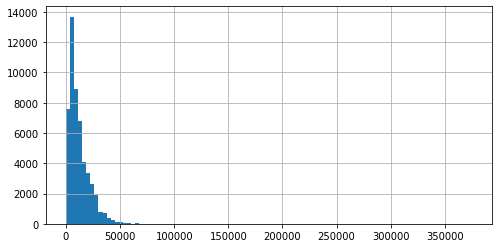


Parameter Ploted : car_age

Main statistics:
 count    51524.000000
mean         8.594985
std          6.103437
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64



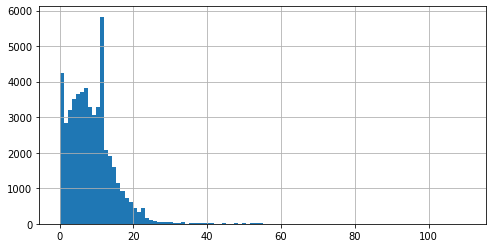


Parameter Ploted : mileage

Main statistics:
 count     51524.000000
mean     115537.871400
std       61860.005467
min           0.000000
25%       73574.000000
50%      114565.000000
75%      151960.000000
max      990000.000000
Name: mileage, dtype: float64



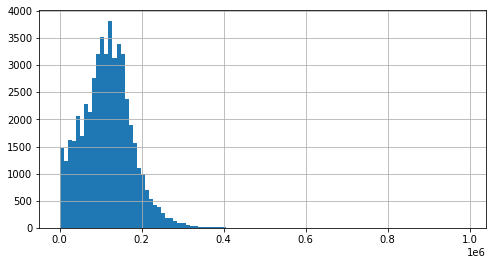


Parameter Ploted : cylinders

Main statistics:
 count    51524.000000
mean         6.089298
std          1.644632
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64



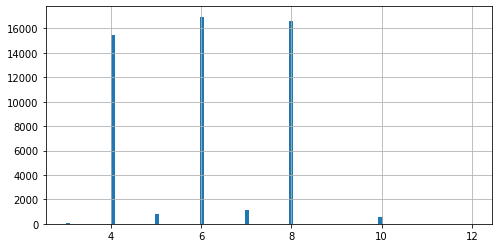


Parameter Ploted : condition

Main statistics:
 count    51524.000000
mean         2.637548
std          0.712449
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64



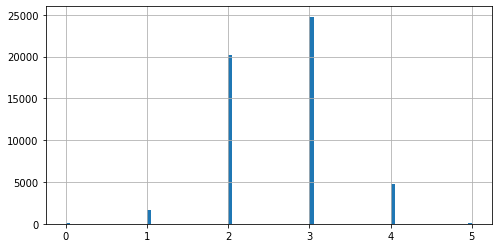


Parameter Ploted : paint_color

Main statistics:
 count     51524
unique       13
top       white
freq      10029
Name: paint_color, dtype: object



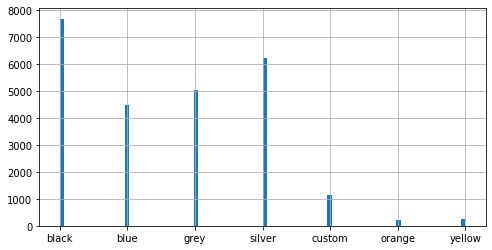

In [46]:
#define a list of parameters to check
parm_lst = ['price','car_age','mileage','cylinders','condition','paint_color']
#Define a function that will plot the histogram for each parameter
def hist_plot(df , param):
    
    print('\nParameter Ploted : {}\n'.format(param))
    print('Main statistics:\n',df[param].describe())
    print()
    plt.figure(figsize=(8,4))
    df[param].hist(bins=100 , range=(df[param].min() , df[param].max()))
    plt.show()
    #plt.boxplot(df[param] , showfliers=False) 
    #plt.show()
    
for prm in parm_lst:
    
    hist_plot(car_data_gen,prm)


**What do we see in every histogram and boxplot**

***price parameter:***
The data distribution is skewd to the right, and there sims to be outliers that are in the area of 30,000 and above.Values that effect the mean by pulling its value up. Ans also outliere (a lot of them) that pushing down the mean twards very low values like 1, which is the min value.
Due to the effect on the mean by outliers, the caenter of the data is the median value , that is not effected by outlier.
The shape of the data suggests that we should change the data ends on bothe side(the lower and the upper), becaus the distribution and the variance are very effected and we eill get wrong values because of that.
To eliminate the outliers effect, we should try using the quatilion of about 3%-5% as the min value. and the highst value should be at around 20,000(an esstimate based on the histogram data).

***mileage parameter:***
The data distribution is skewd to the right,(though much less then the price parameter.Ther sims to be outliers that are in the area of 200,000 and above.Values that effect the mean by pulling its value up. And also outliere that pushing down the mean twards very low values like 0, which is the min value.
Due to the effect on the mean by outliers, the caenter of the data is the median value , that is not effected by outlier.
The shape of the data suggests that we should change the data ends on bothe side(the lower and the upper), becaus the distribution and the variance are efected by these extram values.
To eliminate the outliers effect, we should try using the quatilion of about 5% as the min value where thedata is closer to 0 there. and the highst value should be at around 250,000(an esstimate based on the histogram data).

***car_age parameter:***
The data distribution is skewd to the right. Ther sims to be outliers that are in the area of 25 and above.Values that effect the mean by pulling its value up. And also outliere that pushing down the mean towards very low values like 0, which is the min value These are probably new cars and have no influance on their current manufacture price. We have about 5% of the data that has low values,and it shows very clearly on the histogram.
Due to the effect on the mean by outliers, the caenter of the data is the median value , that is not effected by outlier.
The shape of the data suggests that we should change the data ends on bothe side(the lower and the upper), becaus the distribution and the variance are efected by these values.
To eliminate the outliers effect, we should try using the quatilion of about 5% as the min value where the data is closer to 0 there. And the highst value should be at around 20 based on the histogram data.


***condition parameter:***
The data distribution has a symetrical shape .There are no distinctive outliers.Due to that the mean will be the most a value that will describes the center of the data, since there are no outlier effects here. The shape of the data suggests that we shold not change the range of the data we look at.This is a normal distribution.Most cars are in a good - excelent condition(about 45,000 cars). The rest are distributed between the new-like new conditions and fair and salvage conditions.

***cylinders parameter:***
The data distribution thow it does not look like in first impression is very symetrical, Where some bars have peaks very high comper to others but if we arrange the columns we will see a standard distribution That has a symertrical shape. The data does not seem to have distinctive outliers. With a mean and median have the same value, There for  mean will value that describes the center. The shape of the data suggests that we shold not do here any change of the range of the data.



**We now can moove to the next step an remove the outliers of the data we saw that have them**

## Study and treat outliers


In [47]:
# Determine the lower limits for outliers for the price parameter
#based on our conclusion in the previous section we will base the new range on

lower_val_price = car_data_gen['price'].quantile(q=0.03)
upper_val_price = 20000

print('Median: ' , car_data_gen['price'].median() )
print('The new range is: ',lower_val_price,',',upper_val_price)


Median:  9000.0
The new range is:  1000.0 , 20000


In [48]:
# Determine the lower limits for outliers for the car_age parameter
#based on our conclusion in the previous section we will base the new range based on.

lower_val_car_age = car_data_gen['car_age'].quantile(q=0.05)
upper_val_car_age = 20

print('Median: ' , car_data_gen['car_age'].median() )
print('The new range is: ',lower_val_car_age,',',upper_val_car_age)


Median:  8.0
The new range is:  1.0 , 20


In [49]:
# Determine the lower limits for outliers for the mileage parameter
#based on our conclusion in the previous section we will base the new range on the IRQ and with that calculate the upper and lower
#borders of the data without outliers

lower_val_mileage = car_data_gen['mileage'].quantile(q=0.05)
upper_val_mileage = 250000

print('Median: ' , car_data_gen['mileage'].median() )
print('The new range is: ',lower_val_mileage,',',upper_val_mileage)


Median:  114565.0
The new range is:  18500.0 , 250000


In [50]:
# Store data without outliers in a separate DataFrame
price_filtered = car_data_gen.loc[(car_data_gen['price'] >= lower_val_price)&(car_data_gen['price'] <= upper_val_price)]  
car_age_filtered = car_data_gen.loc[(car_data_gen['car_age'] >= lower_val_car_age)&(car_data_gen['car_age'] <= upper_val_car_age)]
mileage_filtered = car_data_gen.loc[(car_data_gen['mileage'] >= lower_val_mileage)&(car_data_gen['mileage'] <= upper_val_mileage)]
print(len(price_filtered))
print(len(car_age_filtered))
print(len(mileage_filtered))


41385
47736
47904


**With these new ranges we did not loos much data and avided the outliers where we saw ones.**

## Study core parameters without outliers


The new data must have a new distrebution compare to the former one. Let us check the filtered data compare to the complete data


Parameter Ploted : price

Main statistics full data:
 count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

Main statistics filterd data:
 count    41385.000000
mean      8928.263284
std       4991.366906
min       1000.000000
25%       4900.000000
50%       7990.000000
75%      12800.000000
max      20000.000000
Name: price, dtype: float64



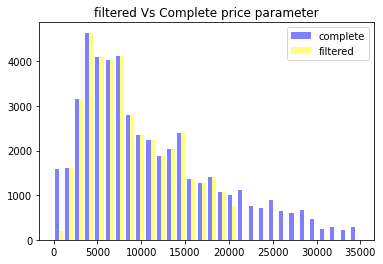


Parameter Ploted : car_age

Main statistics full data:
 count    51524.000000
mean         8.594985
std          6.103437
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

Main statistics filterd data:
 count    47736.000000
mean         8.323006
std          4.650889
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         20.000000
Name: car_age, dtype: float64



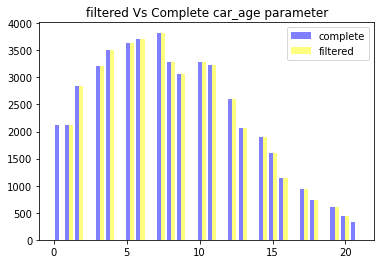


Parameter Ploted : mileage

Main statistics full data:
 count     51524.000000
mean     115537.871400
std       61860.005467
min           0.000000
25%       73574.000000
50%      114565.000000
75%      151960.000000
max      990000.000000
Name: mileage, dtype: float64

Main statistics filterd data:
 count     47904.000000
mean     117286.677083
std       50934.415897
min       18500.000000
25%       81137.000000
50%      117701.000000
75%      151960.000000
max      250000.000000
Name: mileage, dtype: float64



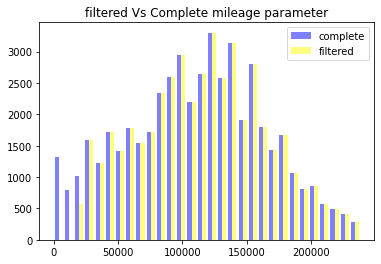

In [51]:
#define a list of parameters to check
parm_lst = ['price','car_age','mileage']
#define a dictionary of filtered tables 
range_dict = {'price':[lower_val_price , upper_val_price] ,'car_age':[lower_val_car_age , upper_val_car_age],'mileage':[lower_val_mileage , upper_val_mileage] }
#define a dictionary of filtered tables 
parm_dict = {'price':price_filtered ,'car_age':car_age_filtered,'mileage':mileage_filtered }

#Define a function that will plot the histogram for each parameter
def hist_plot(df, df_fl , new_rng , param):
    
    print('\nParameter Ploted : {}\n'.format(param))
    print('Main statistics full data:\n',df[param].describe())
    print()
    print('Main statistics filterd data:\n',df_fl[param].describe())
    print()
   
    plt.title('filtered Vs Complete {} parameter'.format(param))
 
    plt.hist([df[param], df_fl[param]],bins=30,color=['blue','yellow'] ,range=(0,df[param].quantile(q=0.97)),alpha=0.5, label=['complete', 'filtered'])
    plt.legend(loc='upper right')
     
    plt.show()

for prm in parm_lst:
    
    hist_plot(car_data_gen,parm_dict[prm],range_dict[prm],prm)
    

**Conclusion**

The Filtered data looks more in the direction of a standard distribution and most outliers seems to be eliminated.


## Ads lifetime


In [52]:
#General statistical data on 'days_listed' parameter

car_data_gen['days_listed'].describe()

count    51524.000000
mean        39.554382
std         28.204413
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

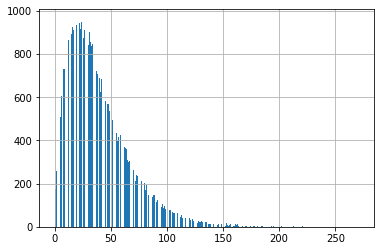

In [53]:
car_data_gen['days_listed'].hist(bins=500)

**The histogram shows that most of the add are distributed between 15-60 days. we can see that there is  skewd to right, and we can also see that without these positive outliers the histogram is almost symetrical. There is the issue of 0 values(no more then value of 1) that look that they have aprox , 250  counts. The outliers are distributed between 125 days to 271(max) days.**
let us see how meny of each of those smaller then 1 days and over 125 days, are.

In [54]:
print('ads listed no more then 1 days:', len(car_data_gen[car_data_gen['days_listed']<=1]))
print('ads listed more then 125 days:', len(car_data_gen[car_data_gen['days_listed']>=125]))
print('ads listed normal span:', len(car_data_gen[(car_data_gen['days_listed']>=15)&(car_data_gen['days_listed']<=60)]))

ads listed no more then 1 days: 227
ads listed more then 125 days: 703
ads listed normal span: 32761


In [55]:
#generate dataset of the 1 day or less records
listed_days_min = car_data_gen[car_data_gen['days_listed']<=1]
#generate dataset of the 125 day or more records
listed_days_max = car_data_gen[car_data_gen['days_listed']>=125]
#generate a dataset of ads listed between 15 and 60 days whish make the most of the data
listed_days_normal = car_data_gen[(car_data_gen['days_listed']>=15)&(car_data_gen['days_listed']<=60)]

listed_days_min.head(20)


,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,has_4wd,date_posted,days_listed,paint_category,weekday_posted_on,car_age,avg_mileage
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,1,2019-03-31,1,4,6,10,23400.0
84,4995,2012,hyundai elantra,4,4,gas,151223,automatic,sedan,custom,0,2018-09-15,1,8,5,6,25204.0
173,21100,2017,chevrolet camaro lt coupe 2d,2,6,gas,24510,other,coupe,red,0,2019-03-29,1,3,4,2,12255.0
460,8990,2016,nissan rogue,3,4,gas,121635,automatic,SUV,grey,0,2018-12-14,1,6,4,2,60818.0
810,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,other,0,2018-05-24,1,1,3,2,2499.0
910,6995,2005,subaru outback,3,4,gas,113000,automatic,wagon,green,1,2018-06-05,1,12,1,13,8692.0
1023,5000,1996,toyota 4runner,2,6,gas,403000,automatic,SUV,black,1,2019-02-08,1,4,4,23,17522.0
1247,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,6,1,10,9330.0
1256,15990,2009,chevrolet tahoe,3,8,gas,95747,automatic,SUV,red,0,2018-12-13,1,3,3,9,10639.0
1320,21400,2015,toyota tacoma,3,6,gas,95750,manual,offroad,grey,1,2018-12-23,1,6,6,3,31917.0


In [56]:
listed_days_max.head(20)

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,has_4wd,date_posted,days_listed,paint_category,weekday_posted_on,car_age,avg_mileage
51,3800,2012,ford focus,2,4,gas,130323,automatic,sedan,black,0,2018-11-29,261,4,3,6,21720.0
89,18800,2015,chevrolet camaro lt coupe 2d,2,6,gas,33926,other,coupe,grey,0,2019-01-16,152,6,2,4,8482.0
104,22900,2014,ford f150 supercrew cab xlt,2,6,gas,73711,automatic,pickup,white,1,2019-02-27,141,2,2,5,14742.0
193,6995,2009,ford ranger,2,4,gas,131150,automatic,pickup,white,0,2019-03-31,130,2,6,10,13115.0
228,8795,2014,honda civic,3,4,gas,85452,automatic,sedan,grey,0,2018-09-11,164,6,1,4,21363.0
334,13000,2004,chevrolet corvette,2,8,gas,85104,automatic,convertible,blue,0,2018-10-12,127,5,4,14,6079.0
414,7995,2008,chevrolet silverado,2,6,gas,146000,automatic,pickup,white,0,2019-02-26,140,2,1,11,13273.0
569,7900,2001,jeep wrangler,3,4,gas,231089,manual,SUV,yellow,1,2018-11-28,128,10,2,17,13593.0
594,7900,2008,toyota highlander,3,6,gas,114720,automatic,SUV,silver,0,2018-09-21,129,7,4,10,11472.0
688,26995,2016,chevrolet silverado,4,8,gas,36645,automatic,pickup,white,1,2018-09-01,152,2,5,2,18322.0


In [57]:
listed_days_normal.head(20)

,price,model_year,model,condition,cylinders,fuel,mileage,transmission,type,paint_color,has_4wd,date_posted,days_listed,paint_category,weekday_posted_on,car_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,1,5,7,20714.0
1,25500,2009,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2,4,9,9856.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4,1,2,40452.0
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4,2,4,14488.0
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,other,1,2018-07-16,19,1,0,6,17362.0
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,5,4,11,13381.0
10,19500,2011,chevrolet silverado 1500,3,8,gas,128413,automatic,pickup,black,1,2018-09-17,38,4,0,7,18345.0
11,8990,2012,honda accord,3,4,gas,111142,automatic,sedan,grey,0,2019-03-28,29,6,3,7,15877.0
12,18990,2012,ram 1500,3,8,gas,140742,automatic,pickup,other,1,2019-04-02,37,1,1,7,20106.0
13,16500,2018,hyundai sonata,3,4,gas,22104,automatic,sedan,silver,0,2019-01-14,29,7,0,1,22104.0


**Ads are mostly listed between 15 to 60 days. Where most will be listed at about 33 days.  with avarage lifespan of almost 40 days.**

## Average price per each type of vehicle


**We should plot a bar chart and see what cars are the most popular and take them as sample to look for the variances in price, and see which parameters effect the price more then the others by looking on the avrage price by type of car.** 

In [58]:
#pivot table of price vs type

car_data_gen_price_all = listed_days_normal.groupby(['type','car_age','mileage','transmission','cylinders','condition','paint_color','paint_category'])['price'].agg(Count='count',Mean='mean').reset_index()
car_data_gen_type_price = pd.pivot_table(listed_days_normal , index='type', values='price' , aggfunc=['mean','count']).reset_index()#.sort_values(by='mean',ascending=False)
car_data_gen_type_price.sort_values(by=('count','price'),inplace=True)
car_data_gen_type_price.reset_index(drop=True , inplace=True)
car_data_gen_type_price = car_data_gen_type_price.loc[(car_data_gen_type_price['type'] != 'bus')]
car_data_gen_type_price.reset_index(drop=True , inplace=True)

car_data_gen_price_all

,type,car_age,mileage,transmission,cylinders,condition,paint_color,paint_category,Count,Mean
0,SUV,0,10,automatic,4,5,white,2,1,30740.0
1,SUV,0,10,automatic,6,4,other,1,1,475.0
2,SUV,0,14,automatic,4,4,white,2,2,326.0
3,SUV,0,59,automatic,6,3,other,1,1,49995.0
4,SUV,0,1003,automatic,8,3,black,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...
28322,wagon,21,157100,automatic,4,3,black,4,1,1850.0
28323,wagon,21,178223,automatic,4,3,red,3,1,1800.0
28324,wagon,21,240000,automatic,4,2,other,1,1,1500.0
28325,wagon,22,250000,automatic,6,1,black,4,1,900.0


There are 4 popular categories that we can take as thos who represent the majority of the car ads.: SUV ,truck,sedan,pickup. 

They cosist more then 42,000 of the ads. which is about 80% of the data.

**we will check SUV and Truck types  to see the price changes to see if we identify any category that influances more then other.**

## Price factors


we will check SUV and Truck types to see the price correlation between .

In [59]:
car_data_gen_price_all.corr()

,car_age,mileage,cylinders,condition,paint_category,Count,Mean
car_age,1.000000,0.470200,0.172462,-0.293730,0.088846,-0.101199,-0.405828
mileage,0.470200,1.000000,0.108083,-0.319962,0.043432,-0.070434,-0.420714
cylinders,0.172462,0.108083,1.000000,-0.059724,-0.082925,0.045301,0.287264
condition,-0.293730,-0.319962,-0.059724,1.000000,-0.027846,-0.011822,0.250033
paint_category,0.088846,0.043432,-0.082925,-0.027846,1.000000,-0.010599,-0.093634
Count,-0.101199,-0.070434,0.045301,-0.011822,-0.010599,1.000000,0.069966
Mean,-0.405828,-0.420714,0.287264,0.250033,-0.093634,0.069966,1.000000


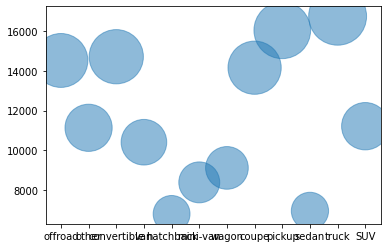

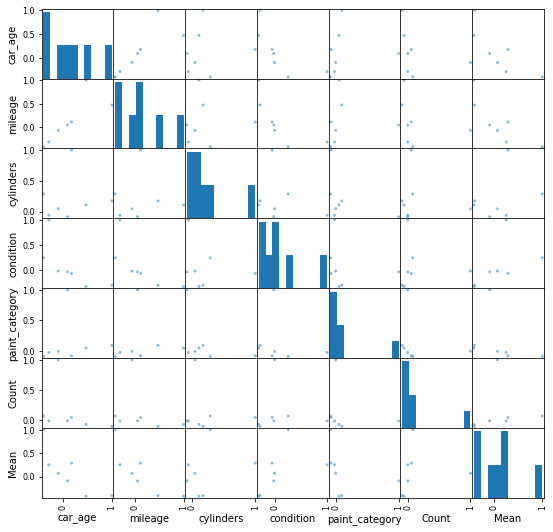

In [60]:
#plot the type of car and price
plt.scatter( x= car_data_gen_type_price['type'] ,y=car_data_gen_type_price['mean','price'] ,s=(car_data_gen_type_price['mean','price']*2/10), alpha=0.5 )
pd.plotting.scatter_matrix(car_data_gen_price_all.corr(), figsize=(9, 9)) 
plt.show()



**Let us extract only SUV and truck types that we have choshen from the most popular in the data set, and see the corralation there.**

In [61]:
#extract the data that is related to SUV and truck types
#car_data_gen_price_all
car_data_type_suv_truck = car_data_gen_price_all.loc[
        (car_data_gen_price_all['type']=='SUV')|(car_data_gen_price_all['type']=='truck')]
#coralation tble for those two types
car_data_type_suv_truck.corr()


,car_age,mileage,cylinders,condition,paint_category,Count,Mean
car_age,1.000000,0.550972,0.140457,-0.347764,0.102591,-0.087343,-0.530409
mileage,0.550972,1.000000,0.132241,-0.336758,0.043276,-0.060281,-0.469156
cylinders,0.140457,0.132241,1.000000,-0.085752,-0.085283,0.080530,0.155561
condition,-0.347764,-0.336758,-0.085752,1.000000,-0.035193,0.005918,0.274055
paint_category,0.102591,0.043276,-0.085283,-0.035193,1.000000,-0.022604,-0.099035
Count,-0.087343,-0.060281,0.080530,0.005918,-0.022604,1.000000,0.047558
Mean,-0.530409,-0.469156,0.155561,0.274055,-0.099035,0.047558,1.000000


*The new table has more then 13000 records, so it is a good sample to see the correlationd between all parameter.*

Now lets make a scatter matrix of this new sample data.

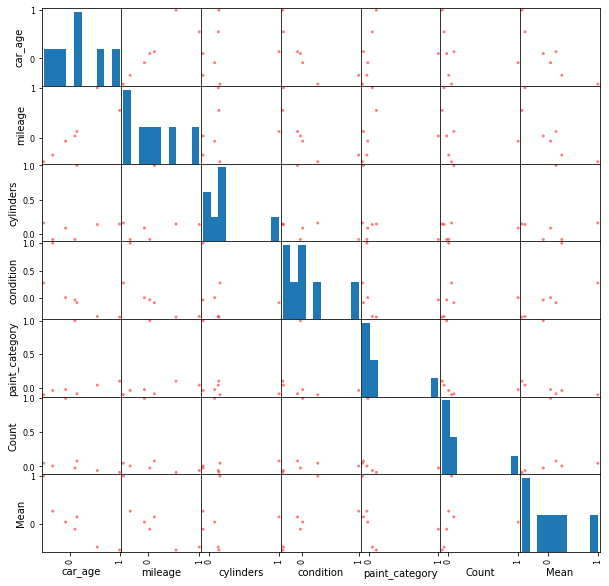

In [62]:
#creating scatter matrix based on the new correlation table
pd.plotting.scatter_matrix(car_data_type_suv_truck.corr(), figsize=(10, 10),c='red') 
plt.show()


## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

**We now will conduct an investigatin of the median for each other category.
eache category must have at least 50 adds so we should take that in account when getting the data for each of them**


There are columns that will need to be categorized , since the plot will not be redable.

In [63]:

#categotizing the data of the milage column to categories 0=0m , 1=1-1000m ,10000 = 1000-10000m ,50000 = 10001-50000 , 
            #100000 = 50001-100000 , 200000 = 100001-200000, 300000= 200001-300000m, 1000000 = all>300000
def mileage_cat(row):
    if row['mileage'] == 0:
        return(0)
    elif row['mileage'] > 0 and row['mileage'] <= 1000:
        return(1000)
    elif row['mileage'] > 1000 and row['mileage'] <= 10000:
        return(10000)
    elif row['mileage'] > 10000 and row['mileage'] <= 50000:
        return(50000)
    elif row['mileage'] > 50000 and row['mileage'] <= 100000:
        return(100000)
    elif row['mileage'] > 100000 and row['mileage'] <= 200000:
        return(200000)
    elif row['mileage'] > 200000 and row['mileage'] <= 300000:
        return(300000)
    elif row['mileage'] > 300000:
        return(1000000)

car_data_gen_price_all['mileage_cat'] = car_data_gen_price_all.apply(mileage_cat,axis=1)

car_data_gen_price_all
       

,type,car_age,mileage,transmission,cylinders,condition,paint_color,paint_category,Count,Mean,mileage_cat
0,SUV,0,10,automatic,4,5,white,2,1,30740.0,1000
1,SUV,0,10,automatic,6,4,other,1,1,475.0,1000
2,SUV,0,14,automatic,4,4,white,2,2,326.0,1000
3,SUV,0,59,automatic,6,3,other,1,1,49995.0,1000
4,SUV,0,1003,automatic,8,3,black,4,4,1.0,10000
...,...,...,...,...,...,...,...,...,...,...,...
28322,wagon,21,157100,automatic,4,3,black,4,1,1850.0,200000
28323,wagon,21,178223,automatic,4,3,red,3,1,1800.0,200000
28324,wagon,21,240000,automatic,4,2,other,1,1,1500.0,300000
28325,wagon,22,250000,automatic,6,1,black,4,1,900.0,300000


In [64]:
#new ver 2
#categorizing car age 

def car_age_cat(row):
    if row['car_age'] == 0:
        return(0)
    elif row['car_age'] > 0 and row['car_age'] <= 3:
        return(3)
    elif row['car_age'] > 3 and row['car_age'] <= 5:
        return(5)
    elif row['car_age'] > 5 and row['car_age'] <= 8:
        return(8)
    elif row['car_age'] > 8 and row['car_age'] <= 10:
        return(10)
    elif row['car_age'] > 10 and row['car_age'] <= 15:
        return(15)
    elif row['car_age'] > 15 and row['car_age'] <= 20:
        return(20)
    elif row['car_age'] > 20 and row['car_age'] <= 30:
        return(30)
    elif row['car_age'] > 30:
        return(30)

car_data_gen_price_all['car_age_cat'] = car_data_gen_price_all.apply(car_age_cat,axis=1)

car_data_gen_price_all

,type,car_age,mileage,transmission,cylinders,condition,paint_color,paint_category,Count,Mean,mileage_cat,car_age_cat
0,SUV,0,10,automatic,4,5,white,2,1,30740.0,1000,0
1,SUV,0,10,automatic,6,4,other,1,1,475.0,1000,0
2,SUV,0,14,automatic,4,4,white,2,2,326.0,1000,0
3,SUV,0,59,automatic,6,3,other,1,1,49995.0,1000,0
4,SUV,0,1003,automatic,8,3,black,4,4,1.0,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28322,wagon,21,157100,automatic,4,3,black,4,1,1850.0,200000,30
28323,wagon,21,178223,automatic,4,3,red,3,1,1800.0,200000,30
28324,wagon,21,240000,automatic,4,2,other,1,1,1500.0,300000,30
28325,wagon,22,250000,automatic,6,1,black,4,1,900.0,300000,30


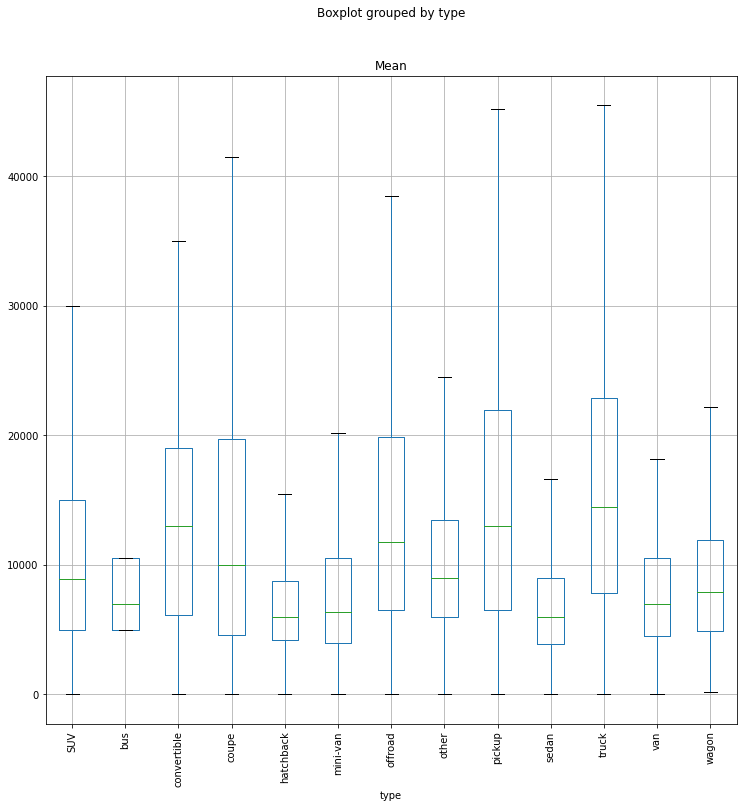

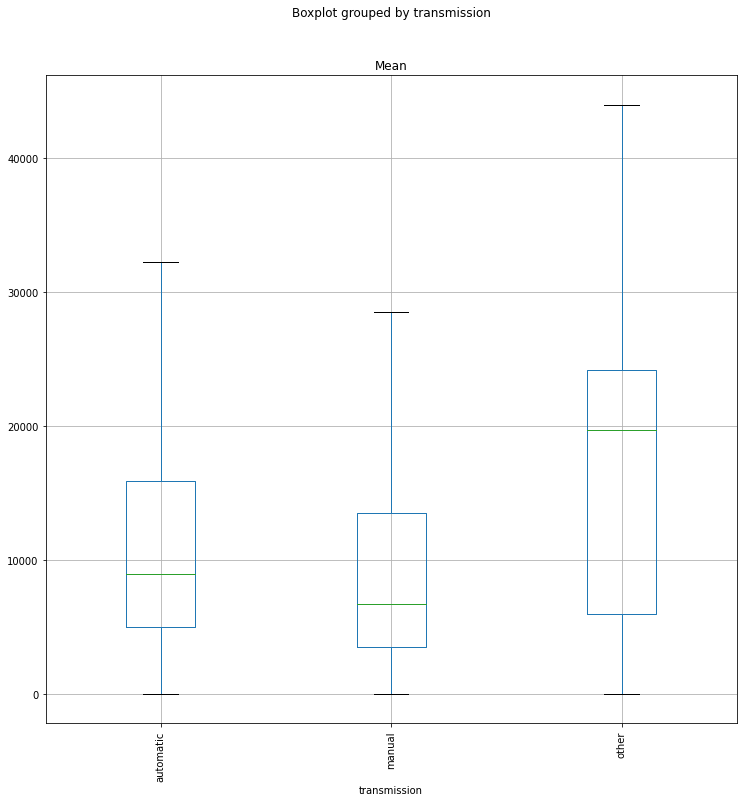

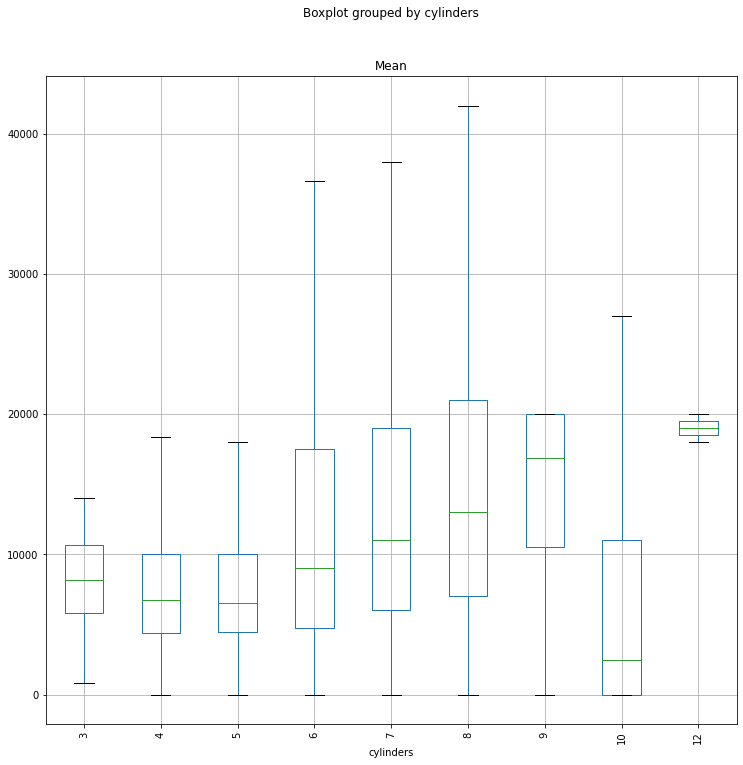

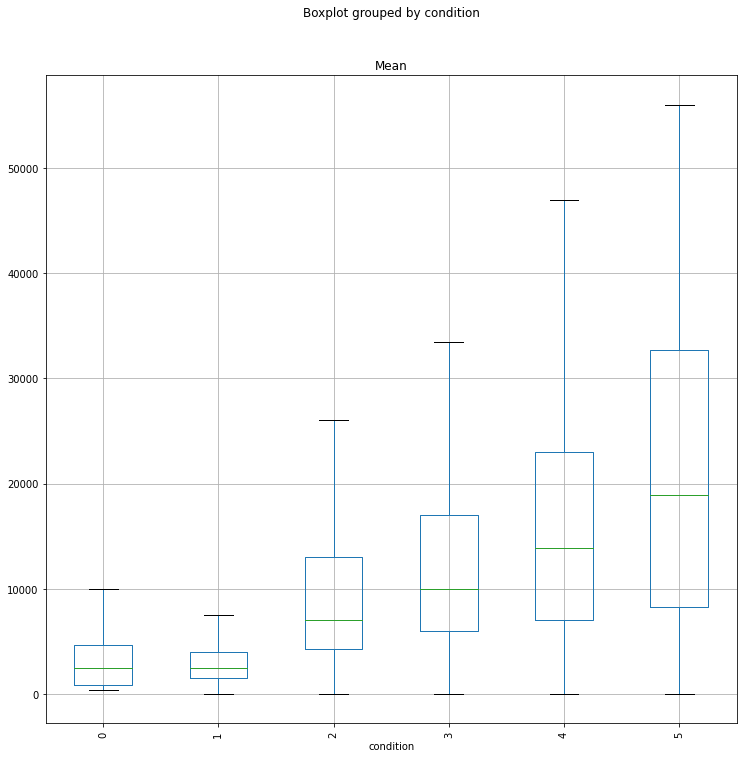

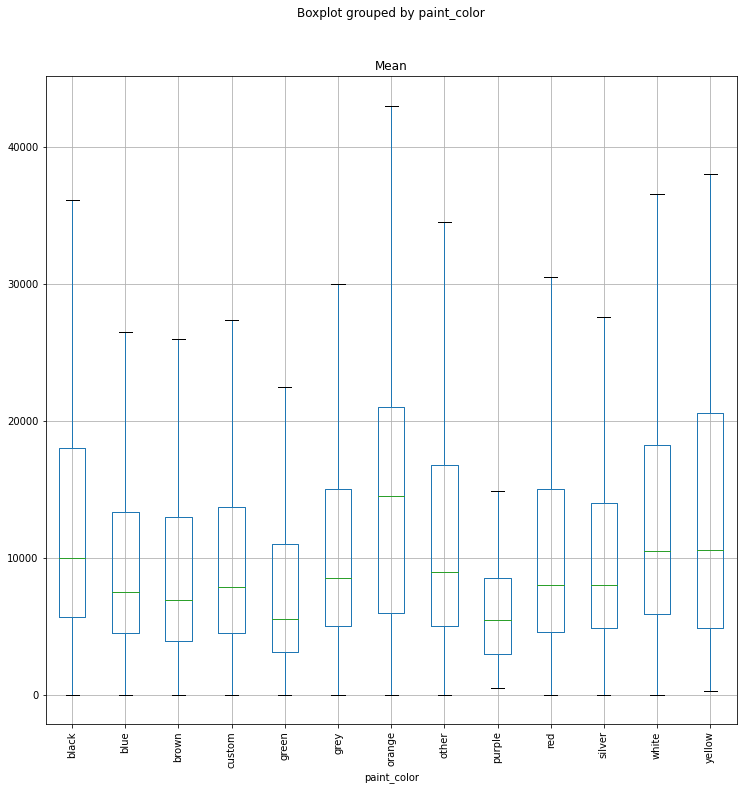

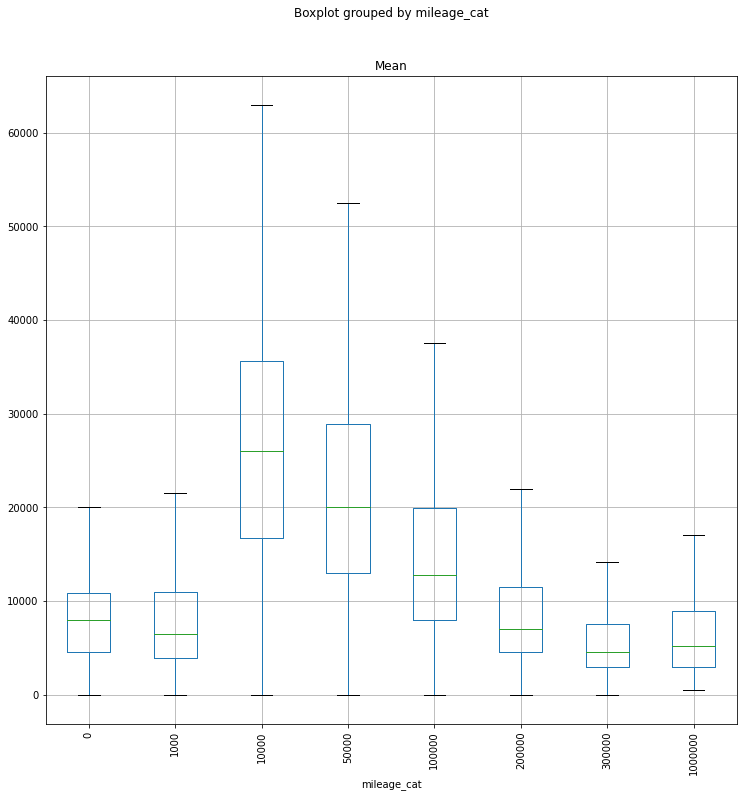

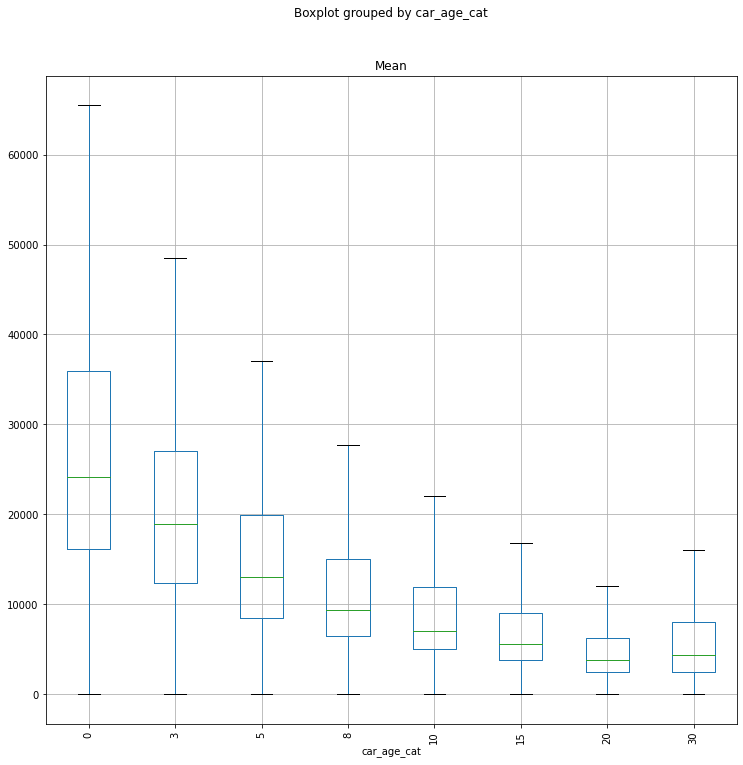

In [65]:
#consracting a loop to boxplot all categories to see ther density and destribution around the Mean prices

#extracting for each category the rows that this category have with at least 50 rows each.
column_list = []
column_list = (list(car_data_gen_price_all.columns))


for cat in column_list:
    
    if cat not in ['Mean','car_age','mileage','paint_category','Count']:
               car_data_gen_price_all.boxplot(column = 'Mean' , by = cat , rot=90 , figsize= (12,12),showfliers=False )
              

**After Navigating through each boxplot of every category , My connclusion are that the only correlation between a category and the price of a car , remains the car age , and car mileage (-Though it has less efecr up to 1000 miles) , and car condition that shows that as more as the car condition is closer to new the car will be worth more(this is a general statement an a logical on also - so there is nothing new about this statement, a new car will always worth more then a second had does.).all other categories has litel or no effect on the mean value of the vehiacle.**

**We have started by asking ourselves: what parameter is the most important in establishing a cars value?**
- the data we got was based on the prices of the car,was determine by that the people who has advertized the car.

- since not all of those who advertised the cars, entered all the information, we had a lot of missing values.

- Because, we needed to maintain all the categories for the comperisson of the parameters, all values had to be filled in .

- We used a few technics in arder to fill the data, if it was to calculate an esstimate based on the data we have, or just to fill an arbituery value like 'other' , when ther was no way to know the value.

- After fillin all the data we could fill , we have deleted 26 lines that the data was still missing. The data was not inflicted because it was less then 0.1% of the data.We still had a lot of records to base our investigation on.

- Without missing values we now checked and saw there were no duplicates in the data.and we can move to analyze the parameters we had.

- We wanted first to see if there are outliers in eache parameter that can effect the resaults

- We have then eliminated the outliers where we found ons and ended with about 85% of the data.

- Now we had the core data and we needed to analize what parameter are effecting the price(one or more), and is this a direct correlation? or is it just another parameter in the over all pricing.?

- We studied the information and new that SUV and Truck types have a great part in the data. and after we examind the whole data for correlations , and fount that there is no apperent direct corelation between one single parameter and the price of the car, we Took the SUV and Truck data , as acore sample to see if we can detect any correlation between one of the parameter and the price that was addvertised.


- We found that the effect on a price has three correlating categories(car age, car condition , and mileage- that has no effect on the firsr 1000 m of a car), and the price is probably effected mostly by thoes parameter, and any other parameter make little to no diffrance in the pricing of a vehiacle.


### Final Conclusion - 

-Though there are some correlations between some of the parameter (like mileage and the age of the car ), to the price, It is not a strong correlation.
It lookes like there is no one parameter the values of, are scatered closely towards it or has a correlation value of over a 0.6.
-The information is almost scatterd alon the parameter evenly and no direct effect can be shown by any of them.
-The the age of the car, its condition and the mileage it has, are the only three parameter that we can see any effect on the values, and they are the only ones that we can say that have any correlation to the price.
-Since there was no one parameter with disinctive effect on the car price , we can get to the conclusion , that there are at least three main parameters and many other with lower effect, which determine the price of a vhiacle.
-The car age ,condition and the mileage are definatly a factor whan establishing a pricing but they do not stand by themselves , when a customer , establish the pricinge .other factore are also taken by consideration though there share is low or do not have any effect, like the color of a care or the number of cylinders.

**In conclusion, There are three main factore that we identify as a high volume parameters,(age of a car,its condition and its mileage) but still , they could not be prooven to have on their own the reason for a price to be as it was advertised. So if we are looking for parameters that influance the price, those three are on the top. But we can not know based on the data we have that they are the only factors to be taken in concidaration by the seller , when a price of a car is determined. It lookes like eache car is priced as a combination of factors and not one or two factores only, and these combination are changing from vhiacle to vhiacle.**